<a href="https://colab.research.google.com/github/kiranmai1226/LLM/blob/main/Behavioural_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta,datetime

In [ ]:
np.random.seed(42)

In [ ]:
n_customers=1000
today=pd.to_datetime('2025-04-07')

In [ ]:
data={
    'Customer_id':[f'Cust_{id}' for id in range(1,n_customers+1)],
    'last_purchase_date':[today-timedelta(days=np.random.randint(1,100)) for _ in range(n_customers)],
    'total_purchases':np.random.randint(1,15,n_customers),
    'total_spent':np.random.randint(100,1000,n_customers),
    'avg_duration_sesssion_minutes':np.round(np.random.uniform(2,25,n_customers),2),
    'total_page_views':np.random.randint(1,200,n_customers),
    'add_to_cart':np.random.randint(2,14,n_customers),
    'click_events':np.random.randint(50,500,n_customers)
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df['recency']=(today-df['last_purchase_date']).dt.days

In [ ]:
print(df)

    Customer_id last_purchase_date  total_purchases  total_spent  \
0        Cust_1         2025-02-25               11          205   
1        Cust_2         2025-03-10               14          986   
2        Cust_3         2025-03-31               10          527   
3        Cust_4         2025-01-24               14          404   
4        Cust_5         2025-01-25                4          971   
..          ...                ...              ...          ...   
995    Cust_996         2025-03-03               10          562   
996    Cust_997         2025-01-12               14          506   
997    Cust_998         2025-03-01               10          187   
998    Cust_999         2025-04-02                2          143   
999   Cust_1000         2025-01-14                2          560   

     avg_duration_sesssion_minutes  total_page_views  add_to_cart  \
0                            11.51                23            8   
1                            19.44           

In [ ]:
df['frequency']=df['total_purchases']
df['monetary']=df['total_spent']

In [ ]:
df['R_score']=pd.qcut(df['recency'],5,labels=[5,4,3,2,1]).astype(int)


In [ ]:
df['F_score']=pd.qcut(df['frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)

In [ ]:
df['M_score']=pd.qcut(df['monetary'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int)

In [ ]:
print(df)

    Customer_id last_purchase_date  total_purchases  total_spent  \
0        Cust_1         2025-02-25               11          205   
1        Cust_2         2025-03-10               14          986   
2        Cust_3         2025-03-31               10          527   
3        Cust_4         2025-01-24               14          404   
4        Cust_5         2025-01-25                4          971   
..          ...                ...              ...          ...   
995    Cust_996         2025-03-03               10          562   
996    Cust_997         2025-01-12               14          506   
997    Cust_998         2025-03-01               10          187   
998    Cust_999         2025-04-02                2          143   
999   Cust_1000         2025-01-14                2          560   

     avg_duration_sesssion_minutes  total_page_views  add_to_cart  \
0                            11.51                23            8   
1                            19.44           

In [ ]:
df['RFM_segment']=df['R_score'].astype(str)+df['F_score'].astype(str)+df['M_score'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['likely_to_purchase']=((df['R_score']>4)&
                          (df['F_score']>4)&
                          (df['M_score']>4)&
                          (df['add_to_cart']>5)).astype(int)

In [ ]:
features=['recency','frequency','monetary','avg_duration_sesssion_minutes','total_page_views','add_to_cart','click_events']
X=df[features]
y=df['likely_to_purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)
print("Classification Report : ",classification_report(y_test,y_pred))
print("confusion matrix : ",confusion_matrix(y_test,y_pred))


Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00       199
           1       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200

confusion matrix :  [[199   0]
 [  1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


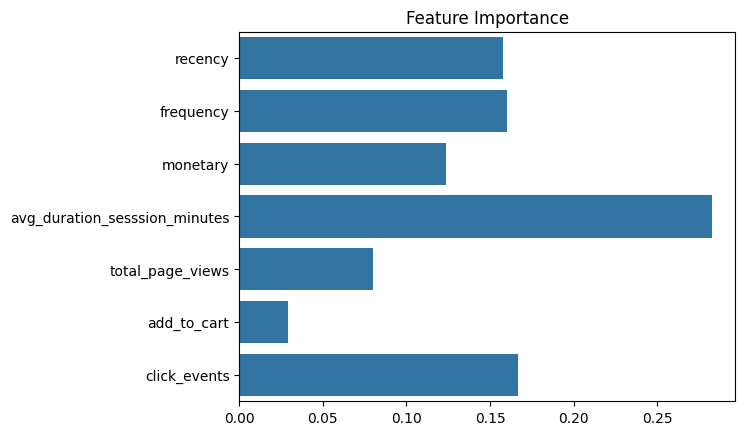

In [ ]:
importances=model.feature_importances_
sns.barplot(x=importances,y=features)
plt.title('Feature Importance')
plt.show()

In [ ]:
df_test=X_test.copy()

In [ ]:
print(df_test)

     recency  frequency  monetary  avg_duration_sesssion_minutes  \
521       95          2       452                          23.77   
737       98          2       863                           9.83   
740       79         13       871                          23.41   
660       65          5       229                           9.86   
411        4          3       685                          12.80   
..       ...        ...       ...                            ...   
408       96          3       362                          15.89   
332       53          1       596                           4.93   
208       20          1       584                           9.90   
613       16         14       677                          13.31   
78        62          4       916                          20.43   

     total_page_views  add_to_cart  click_events  
521               137           11           161  
737                36            5           222  
740                76         

In [ ]:
df_test['customer_id']=df.loc[X_test.index,'Customer_id']

In [ ]:
y_probs=model.predict_proba(X_test)[:,1]

In [ ]:
print(y_probs)

[0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.04 0.   0.03 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.   0.   0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.04 0.
 0.   0.   0.   0.   0.   0.02 0.   0.   0.01 0.06 0.   0.01 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.03 0.01 0.   0.   0.01 0.   0.   0.   0.03 0.   0.   0.   0.
 0.   0.   0.   0.  ]


In [ ]:
df_test['actual']=y_test.values
df_test['prob']=y_probs

In [ ]:
df_ranked=df_test.sort_values(by='prob',ascending=False)
print(df_ranked[['customer_id','actual','prob']].head(10))


    customer_id  actual  prob
55      Cust_56       0  0.06
601    Cust_602       0  0.04
237    Cust_238       0  0.04
101    Cust_102       0  0.04
829    Cust_830       0  0.03
294    Cust_295       0  0.03
837    Cust_838       0  0.03
526    Cust_527       0  0.03
985    Cust_986       0  0.02
849    Cust_850       1  0.02


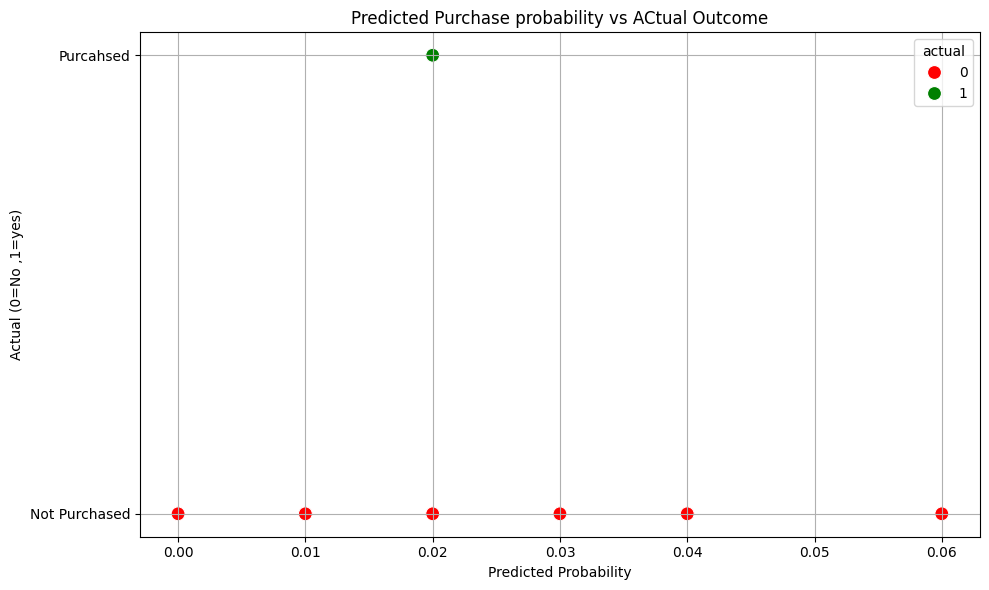

In [ ]:
top_n=10
top_customers=df_ranked.head(top_n)
plt.figure(figsize=(10,6))
sns.scatterplot(x='prob',y='actual',hue='actual',data=df_ranked,palette={0:'red',1:'green'},s=100)
plt.title('Predicted Purchase probability vs ACtual Outcome')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual (0=No ,1=yes)')
plt.yticks([0,1],['Not Purchased','Purcahsed'])
plt.grid(True)
plt.tight_layout()
plt.show()
